## PURPOSE
This notebook is used for preliminary/exploratory analysis of the data obtained from Unity - that being the "Hand data" that we have obtained for a few different experiments.

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import plotly.graph_objects as go

In [2]:
# set the current working directory to the right location
from IPython.core.getipython import get_ipython

# Get the notebook's full path
notebook_path = os.path.abspath(get_ipython().starting_dir)

# Get the directory containing the script
os.chdir(notebook_path + '/2023-08-15/Wrist ROM - Smooth')

# Load in the csv files from my local machine
p_smooth_ROM = pd.read_csv('20230815_185324_pinky.csv').iloc[0:5000,:]
r_smooth_ROM = pd.read_csv('20230815_185324_ring.csv').iloc[0:5000,:]
m_smooth_ROM = pd.read_csv('20230815_185324_middle.csv').iloc[0:5000,:]
i_smooth_ROM = pd.read_csv('20230815_185323_index.csv').iloc[0:5000,:]
t_smooth_ROM = pd.read_csv('20230815_185323_thumb.csv').iloc[0:5000,:]

In [3]:
# Create an np.array which is the vector (t,x,y,z) for the metacarpal index bone
# Need to have a vector from meta to prox, so do prox - meta for vector 
vector_array = np.transpose(np.array([np.asarray(i_smooth_ROM.iloc[:,0]),
                         np.asarray(i_smooth_ROM.iloc[:,4] - i_smooth_ROM.iloc[:,1]),
                         np.asarray(i_smooth_ROM.iloc[:,5] - i_smooth_ROM.iloc[:,2]),
                         np.asarray(i_smooth_ROM.iloc[:,6] - i_smooth_ROM.iloc[:,3])]))

# I want to normalise these vectors - to do this I should divide each element by 1/sqrt of that rows vector size
vector_sizes = np.sqrt(np.sum(np.square(vector_array[:,1:3]), axis=1))

# Normalise the vectors by dividing through by the vector size
vector_array[:,1:3] = np.divide(vector_array[:,1:3],vector_sizes[:,None])

Text(0.5, 1.0, 'Index Finger Metacarpal Bone Vector components over time')

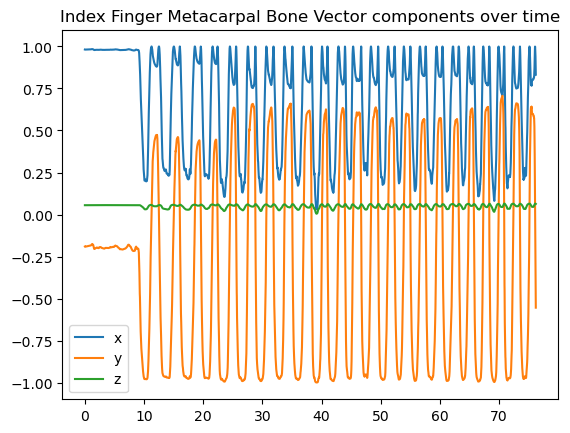

In [4]:
# Plot the vectors x, y, z over time.
plt.plot(vector_array[:,0], vector_array[:,1], label = "x")
plt.plot(vector_array[:,0], vector_array[:,2], label = "y")	
plt.plot(vector_array[:,0], vector_array[:,3], label = "z")
plt.legend()
plt.title("Index Finger Metacarpal Bone Vector components over time")

There is quite obviously a pattern in the above for smooth wrist movements - now, let's go ahead and create a vector for the starting, stationary motion, and measure angles from there.

## Creating the original, stationary vector
In order to accurately evaluate ROM - we will need an *original, stationary vector direction*. This can be achieved by using the **median** for the first part of the dataset for all x,y,z components, and using these as the original vector.

From my understanding of vectors through robotics, the best way to find the angle of rotation is setting an origin axis, and measuring the rotation about this axis.

Since we are measuring wrist ROM, and specificially wrist extension/flexion, we will need to set the origin vector to be the along the metacarpal base bones - likely just from index to middle finger.

In [5]:
# Get the data for the first 5 seconds of data 
i_baseline = i_smooth_ROM[i_smooth_ROM['time'] < 5].loc[:,"meta_x":"meta_z"]

# Create the vector as the median of all of these datapoints:
i_baseline = i_baseline.median(axis=0).to_numpy()

# Now make this vector normalised:
i_baseline = i_baseline / np.linalg.norm(i_baseline)
i_baseline

array([-0.22904201,  0.97175305, -0.05688391])

In [6]:
# Now we want to get the normalised vector about which this vector rotates. Wrist ROM - so the base will be between the metacarpals
i_meta_base = i_smooth_ROM[i_smooth_ROM['time'] < 5].loc[:,"meta_x":"meta_z"].median(axis=0).to_numpy()
m_meta_base = m_smooth_ROM[m_smooth_ROM['time'] < 5].loc[:,"meta_x":"meta_z"].median(axis=0).to_numpy()
r_meta_base = r_smooth_ROM[r_smooth_ROM['time'] < 5].loc[:,"meta_x":"meta_z"].median(axis=0).to_numpy()
p_meta_base = p_smooth_ROM[p_smooth_ROM['time'] < 5].loc[:,"meta_x":"meta_z"].median(axis=0).to_numpy()

# Get the vector directions
m_based_dir_vector = m_meta_base - i_meta_base
r_based_dir_vector = r_meta_base - i_meta_base
p_based_dir_vector = p_meta_base - i_meta_base

# Normalise the vectors
m_based_dir_vector = m_based_dir_vector / np.linalg.norm(m_based_dir_vector)
r_based_dir_vector = r_based_dir_vector / np.linalg.norm(r_based_dir_vector)
p_based_dir_vector = p_based_dir_vector / np.linalg.norm(p_based_dir_vector)
a_based_dir_vector = np.mean([m_based_dir_vector, r_based_dir_vector, p_based_dir_vector], axis=0)

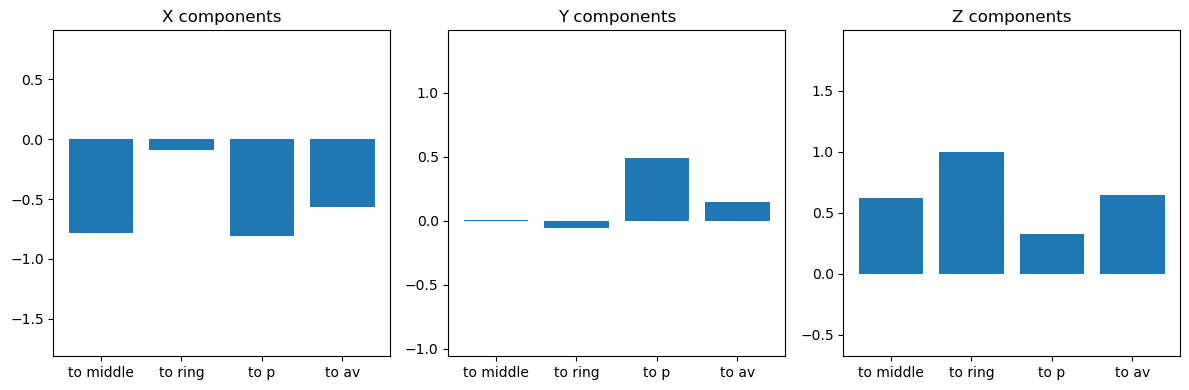

In [7]:
# Extract x, y, z components
m_x, m_y, m_z = m_based_dir_vector
r_x, r_y, r_z = r_based_dir_vector
p_x, p_y, p_z = p_based_dir_vector
a_x, a_y, a_z = a_based_dir_vector

# Plot x-components
plt.figure(figsize=(12, 4))  # Setting a figsize for clearer viewing

# Subplot for x-components
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.bar(['to middle', 'to ring', 'to p', 'to av'], [m_x, r_x, p_x, a_x])
plt.title("X components")
plt.ylim(min(m_x, r_x, p_x, a_x) - 1, max(m_x, r_x, p_x, a_x) + 1)

# Subplot for y-components
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.bar(['to middle', 'to ring', 'to p', 'to av'], [m_y, r_y, p_y, a_y])
plt.title("Y components")
plt.ylim(min(m_y, r_y, p_y, a_y) - 1, max(m_y, r_y, p_y, a_y) + 1)

# Subplot for z-components
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.bar(['to middle', 'to ring', 'to p', 'to av'], [m_z, r_z, p_z, a_z])
plt.title("Z components")
plt.ylim(min(m_z, r_z, p_z, a_z) - 1, max(m_z, r_z, p_z, a_z) + 1)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

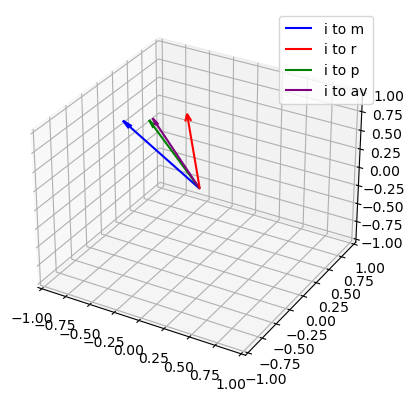

In [8]:
# Plotting 3D vectors
# Create a new figure
fig = plt.figure()

# Add 3D subplot
# The argument (1,1,1) means a single subplot in the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
ax.quiver(0, 0, 0, m_based_dir_vector[0], m_based_dir_vector[1], m_based_dir_vector[2], color = "b", arrow_length_ratio=0.1, label = "i to m")
ax.quiver(0, 0, 0, r_based_dir_vector[0], r_based_dir_vector[1], r_based_dir_vector[2], color = "r", arrow_length_ratio=0.1, label = "i to r")
ax.quiver(0, 0, 0, p_based_dir_vector[0], p_based_dir_vector[1], p_based_dir_vector[2], color = "g", arrow_length_ratio=0.1, label = "i to p")
ax.quiver(0, 0, 0, a_based_dir_vector[0], a_based_dir_vector[1], a_based_dir_vector[2], color = "purple", arrow_length_ratio=0.1, label = "i to av")

# Set limits to make the plot more visually appealing
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.legend()
plt.show()

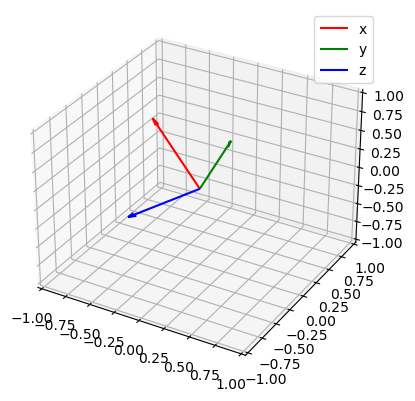

In [9]:
# Set the x, y, and z base vectors
x_base = a_based_dir_vector
y_base = i_baseline
z_base = np.cross(x_base, y_base)

# Plot onto 3D axes
fig = plt.figure()

# Add 3D subplot
# The argument (1,1,1) means a single subplot in the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
ax.quiver(0, 0, 0, x_base[0], x_base[1], x_base[2], color = "r", arrow_length_ratio=0.1, label = "x")
ax.quiver(0, 0, 0, y_base[0], y_base[1], y_base[2], color = "g", arrow_length_ratio=0.1, label = "y")
ax.quiver(0, 0, 0, z_base[0], z_base[1], z_base[2], color = "b", arrow_length_ratio=0.1, label = "z")

# Set limits to make the plot more visually appealing
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Show the plot
plt.legend()
plt.show()

In [10]:
# Confirm that these are perpendicular to each other using dot product (should be 0)
print(f"Y projected onto x has value of: {np.dot(y_base, x_base)}.")
print(f"Z projected onto x has value of: {np.dot(z_base, y_base)}.")
print(f"Z projected onto y has value of: {np.dot(z_base, y_base)}.")

Y projected onto x has value of: 0.23172153993735028.
Z projected onto x has value of: 4.163336342344337e-17.
Z projected onto y has value of: 4.163336342344337e-17.


In [11]:
# We have a projection of y onto x. This isn't ideal, so let's see if any of our other potential bases have a lower dot product:
print(f"Y projected onto x_a has value of: {np.dot(y_base, a_based_dir_vector)}.")
print(f"Y projected onto x_m has value of: {np.dot(y_base, m_based_dir_vector)}.")
print(f"Y projected onto x_r has value of: {np.dot(y_base, r_based_dir_vector)}.")
print(f"Y projected onto x_p has value of: {np.dot(y_base, p_based_dir_vector)}.")

Y projected onto x_a has value of: 0.23172153993735028.
Y projected onto x_m has value of: 0.14809686255582857.
Y projected onto x_r has value of: -0.09378810875476773.
Y projected onto x_p has value of: 0.6408558660109901.


In [12]:
# Pinky is really bad - so maybe let's do the average between middle and ring fingers
x_base = np.mean([m_based_dir_vector, r_based_dir_vector], axis=0)
y_base = i_baseline
z_base = np.cross(x_base, y_base)

print(f"Y projected onto new x_a has value of: {np.dot(y_base, x_base)}.") # Minimum now - but will likely need to double chekc if this is always minimal over testing series

Y projected onto new x_a has value of: 0.027154376900530408.


## Getting the angle of rotation
So we have gone ahead and created a good base vector system, with y along the index finger's metacarpal, x along the wrist, and the z as being the cross product of the two.

This is a good start, now we need to go ahead and get the angles of rotation. To do this, we will get the dot product of the metacarpal vector on the y and z axis, which gives us a unit circle to basically be working with.

These values will then be used in an Atan2 approach to get the angle of rotation around the x-axis

In [13]:
# Take the original vector array, and project onto the y and z axes:
x_proj = []
for i in range(vector_array.shape[0]):
    x_proj.append(np.dot(vector_array[i,1:4], x_base))

y_proj = []
for i in range(vector_array.shape[0]):
    y_proj.append(np.dot(vector_array[i,1:4], y_base))
    
z_proj = []
for i in range(vector_array.shape[0]):
    z_proj.append(np.dot(vector_array[i,1:4], z_base))

Text(0.5, 1.0, "Normalised x', y' and z' projections over time")

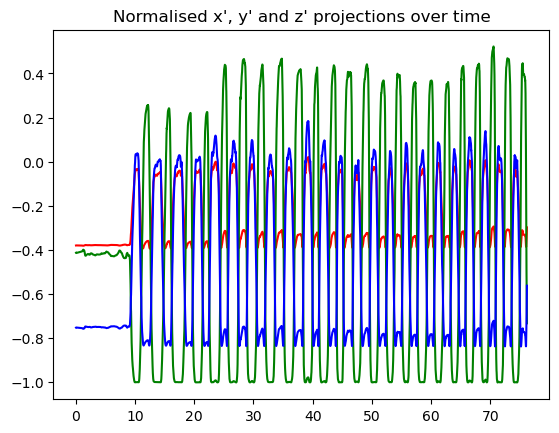

In [14]:
plt.plot(vector_array[:,0], x_proj, 'r', label="x' projection")
plt.plot(vector_array[:,0], y_proj, 'g', label="y' projection")
plt.plot(vector_array[:,0], z_proj, 'b', label="z' projection")
plt.title("Normalised x', y' and z' projections over time")

In [15]:
# Get the vector for the base of the index metacarpal to the base of the middle metacarpal - let's see how consistent these are by doing it for every metacarpal base (aside from thumb)
def generate_origin_axis(index_finger = i_smooth_ROM, other_finger = m_smooth_ROM, plot = False):
    """Generate the origin axis for the index finger based on the base of the index metacarpal to the base of another bone."""
    # Expected inputs are pandas dbs with the following columns: 't', 'x', 'y', 'z'
    # Get the base of the index metacarpal as a vector.
    # Can assume the first 5s of data are fine
    index_base = index_finger.loc[:,"meta_x":"meta_z"][i_smooth_ROM['time'] < 5]
    index_base = index_finger.loc[:,"meta_x":"meta_z"][i_smooth_ROM['time'] < 5]
     
    

In [29]:
# Vectors for bones as taken from Unity print to console - verify if it makes a hand

# Thumb
t_0 = np.array([-0.09087672, 0.297525, 0.01354451])
t_1 = t_0
t_2 = np.array([-0.05228271, 0.2949955, 0.04200516])
t_3 = np.array([-0.0347775, 0.2968915, 0.06366901])
# Thumb vectors
t_meta = t_2 - t_0 # thumb meta - different from others because t1=t0
t_prox = t_3 - t_2

# Index Finger
i_0 = np.array([-0.09818245, 0.284996, 0.01792072])
i_1 = np.array([-0.07332463, 0.277377, 0.07577597])
i_2 = np.array([-0.06616851, 0.2721495, 0.1048155])
i_3 = np.array([-0.06074364, 0.2714914, 0.1241156])
# Index Vectors
i_meta = i_1 - i_0
i_prox = i_2 - i_1
i_intr = i_3 - i_2

# Middle Finger
m_0 = np.array([-0.1050918, 0.2840838, 0.02302483])
m_1 = np.array([-0.08916742, 0.2781164, 0.08072193])
m_2 = np.array([-0.08218304, 0.2718804, 0.1140658])
m_3 = np.array([-0.07664821, 0.2717459, 0.1379669])
# Middle Vectors
m_meta = i_1 - i_0
m_prox = i_2 - i_1
m_intr = i_3 - i_2

# Ring Finger
r_0 = np.array([-0.1146107, 0.287746, 0.02754645])
r_1 = np.array([-0.1081453, 0.28392, 0.08102696])
r_2 = np.array([-0.108717, 0.2723459, 0.1129092])
r_3 = np.array([-0.1082944, 0.2676336, 0.1323489])
# Ring Vectors
r_meta = i_1 - i_0
r_prox = i_2 - i_1
r_intr = i_3 - i_2

# Pinky Finger
p_0 = np.array([-0.1218093, 0.2964639, 0.02668664])
p_1 = np.array([-0.123096, 0.2923709, 0.0764946])
p_2 = np.array([-0.1262955, 0.2872118, 0.09972517])
p_3 = np.array([-0.1266441, 0.2857648, 0.117803])
# Pinky Vectors
p_meta = i_1 - i_0
p_prox = i_2 - i_1
p_intr = i_3 - i_2

In [30]:
# Define some sample 3D vectors
vectors = [
    {"name": "vector_1", "vector": [0.1, 0, 0]},
    {"name": "vector_2", "vector": [0, 0.1, 0]},
    {"name": "vector_3", "vector": [0, 0, 0.1]},
]

# Add the finger vectors 1 by one to the vectors dictionary. Have the offset as the start point of the previous locatio
extra_vector = {"name": "t_meta", "start": m_0, "vector": t_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "t_prox", "start": m_0 + t_meta, "vector": t_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_meta", "start": i_0, "vector": i_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_prox", "start": i_0 + i_meta, "vector": i_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_intr", "start": i_0 + i_meta + i_prox, "vector": i_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_meta", "start": m_0, "vector": m_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_prox", "start": m_0 + m_meta, "vector": m_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_intr", "start": m_0 + m_meta + m_prox, "vector": m_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_meta", "start": r_0, "vector": r_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_prox", "start": r_0 + r_meta, "vector": r_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_intr", "start": r_0 + r_meta + r_prox, "vector": r_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_meta", "start": p_0, "vector": p_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_prox", "start": p_0 + p_meta, "vector": p_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_intr", "start": p_0 + p_meta + p_prox, "vector": p_intr}
vectors.append(extra_vector)  # Add extra vector to the list

# EXTRA CODE FROM BELOW
i_baseline = np.array([0.4127716, -0.1715176, 0.8945398])
extra_vector = {"name": "BASELINE_VECTOR", "start": i_0, "vector": i_baseline}
vectors.append(extra_vector)  # Add extra vector to the list



# Create an empty figure
fig = go.Figure()

# Add each vector as a 3D line
for vec in vectors:
    start_point = vec.get("start", [0, 0, 0])  # Get starting point, default to origin
    end_point = [start_point[i] + vec["vector"][i] for i in range(3)]  # Calculate end point based on start and vector
    fig.add_trace(go.Scatter3d(x=[start_point[0], end_point[0]], 
                               y=[start_point[1], end_point[1]], 
                               z=[start_point[2], end_point[2]], 
                               mode="lines+text",
                               name=vec["name"],
                               text=[vec["name"]],
                               textposition="top center"))
# Set custom plot limits and aspect ratio
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-0.2, 0.0]),
        yaxis=dict(range=[0.2, 0.4]),
        zaxis=dict(range=[0, 0.2]),
        aspectmode="cube"
    )
)

# Show the plot
fig.show()

In [32]:
# Define some sample 3D vectors
vectors = [
    {"name": "vector_1", "vector": [0.1, 0, 0]},
    {"name": "vector_2", "vector": [0, 0.1, 0]},
    {"name": "vector_3", "vector": [0, 0, 0.1]},
]

t_0 = np.array([-0.07971342, 0.3139738, 0.0123035])
i_0 = np.array([-0.0883914, 0.3018003, 0.01670868])
m_0 = np.array([-0.09523932, 0.3015427, 0.02256652])
r_0 = np.array([-0.1041876, 0.3062259, 0.02846858])
p_0 = np.array([-0.1105089, 0.3161414, 0.02893008])

t_meta = np.array([0.03859401, -0.002529502, 0.02846064])
t_prox = np.array([0.01750522, 0.001895994, 0.02166386])

i_meta = np.array([0.02485783, -0.007618994, 0.05785526])
i_prox = np.array([0.007156119, -0.005227506, 0.02903957])
i_intr = np.array([0.005424865, -0.0006580949, 0.01930009])

m_meta = np.array([0.01592434, -0.005967349, 0.0576971])
m_prox = np.array([0.006984375, -0.006235957, 0.03334391])
m_intr = np.array([0.005534835, -0.0001345873, 0.02390105])

r_meta = np.array([0.006465346, -0.003825903, 0.05348051])
r_prox = np.array([ -0.0005716905, -0.01157412, 0.03188221])
r_intr = np.array([0.000422582, -0.004712373, 0.01943971])

p_meta = np.array([ -0.001286604, -0.004093051, 0.04980796])
p_prox = np.array([ -0.00319957, -0.00515908, 0.02323057])
p_intr = np.array([ -0.0003486127, -0.001446962, 0.01807785])

extra_vector = {"name": "t_meta", "start": m_0, "vector": t_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "t_prox", "start": m_0 + t_meta, "vector": t_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_meta", "start": i_0, "vector": i_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_prox", "start": i_0 + i_meta, "vector": i_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_intr", "start": i_0 + i_meta + i_prox, "vector": i_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_meta", "start": m_0, "vector": m_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_prox", "start": m_0 + m_meta, "vector": m_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_intr", "start": m_0 + m_meta + m_prox, "vector": m_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_meta", "start": r_0, "vector": r_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_prox", "start": r_0 + r_meta, "vector": r_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_intr", "start": r_0 + r_meta + r_prox, "vector": r_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_meta", "start": p_0, "vector": p_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_prox", "start": p_0 + p_meta, "vector": p_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_intr", "start": p_0 + p_meta + p_prox, "vector": p_intr}
vectors.append(extra_vector)  # Add extra vector to the list



# Create an empty figure
fig = go.Figure()

# Add each vector as a 3D line
for vec in vectors:
    start_point = vec.get("start", [0, 0, 0])  # Get starting point, default to origin
    end_point = [start_point[i] + vec["vector"][i] for i in range(3)]  # Calculate end point based on start and vector
    fig.add_trace(go.Scatter3d(x=[start_point[0], end_point[0]], 
                               y=[start_point[1], end_point[1]], 
                               z=[start_point[2], end_point[2]], 
                               mode="lines+text",
                               name=vec["name"],
                               text=[vec["name"]],
                               textposition="top center"))
# Set custom plot limits and aspect ratio
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-0.2, 0.0]),
        yaxis=dict(range=[0.2, 0.4]),
        zaxis=dict(range=[0, 0.2]),
        aspectmode="cube"
    )
)

# Show the plot
fig.show()

In [34]:
# Define some sample 3D vectors
vectors = [
    {"name": "vector_1", "vector": [0.1, 0, 0]},
    {"name": "vector_2", "vector": [0, 0.1, 0]},
    {"name": "vector_3", "vector": [0, 0, 0.1]},
]

extra_vector = {"name": "t_meta", "start": m_0, "vector": t_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "t_prox", "start": m_0 + t_meta, "vector": t_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_meta", "start": i_0, "vector": i_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_prox", "start": i_0 + i_meta, "vector": i_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "i_intr", "start": i_0 + i_meta + i_prox, "vector": i_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_meta", "start": m_0, "vector": m_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_prox", "start": m_0 + m_meta, "vector": m_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "m_intr", "start": m_0 + m_meta + m_prox, "vector": m_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_meta", "start": r_0, "vector": r_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_prox", "start": r_0 + r_meta, "vector": r_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "r_intr", "start": r_0 + r_meta + r_prox, "vector": r_intr}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_meta", "start": p_0, "vector": p_meta}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_prox", "start": p_0 + p_meta, "vector": p_prox}
vectors.append(extra_vector)  # Add extra vector to the list
extra_vector = {"name": "p_intr", "start": p_0 + p_meta + p_prox, "vector": p_intr}
vectors.append(extra_vector)  # Add extra vector to the list

i_baseline = np.array([0.4127716, -0.1715176, 0.8945398])
extra_vector = {"name": "BASELINE_VECTOR", "start": i_0, "vector": i_baseline}
vectors.append(extra_vector)  # Add extra vector to the list


# Create an empty figure
fig = go.Figure()

# Add each vector as a 3D line
for vec in vectors:
    start_point = vec.get("start", [0, 0, 0])  # Get starting point, default to origin
    end_point = [start_point[i] + vec["vector"][i] for i in range(3)]  # Calculate end point based on start and vector
    fig.add_trace(go.Scatter3d(x=[start_point[0], end_point[0]], 
                               y=[start_point[1], end_point[1]], 
                               z=[start_point[2], end_point[2]], 
                               mode="lines+text",
                               name=vec["name"],
                               text=[vec["name"]],
                               textposition="top center"))
# Set custom plot limits and aspect ratio
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-0.2, 0.0]),
        yaxis=dict(range=[0.2, 0.4]),
        zaxis=dict(range=[0, 0.2]),
        aspectmode="cube"
    )
)

# Show the plot
fig.show()